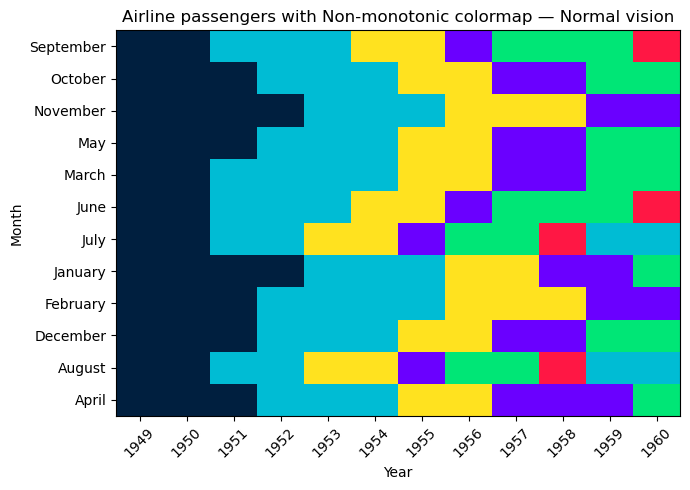

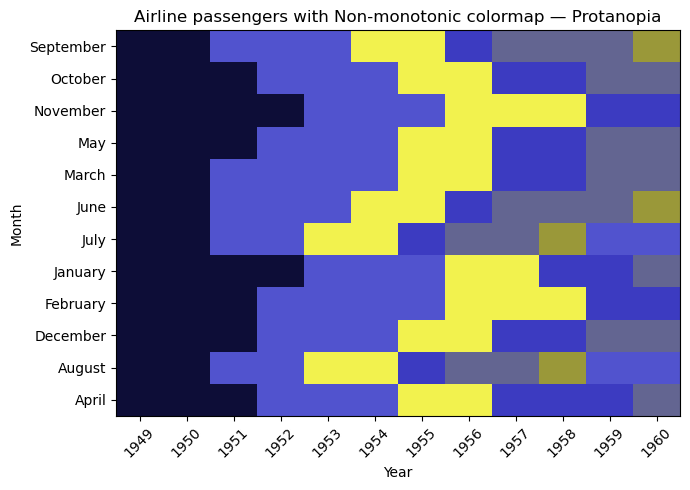

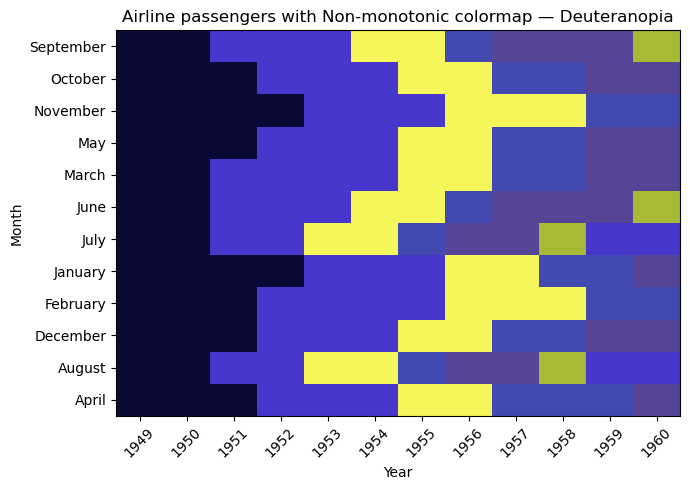

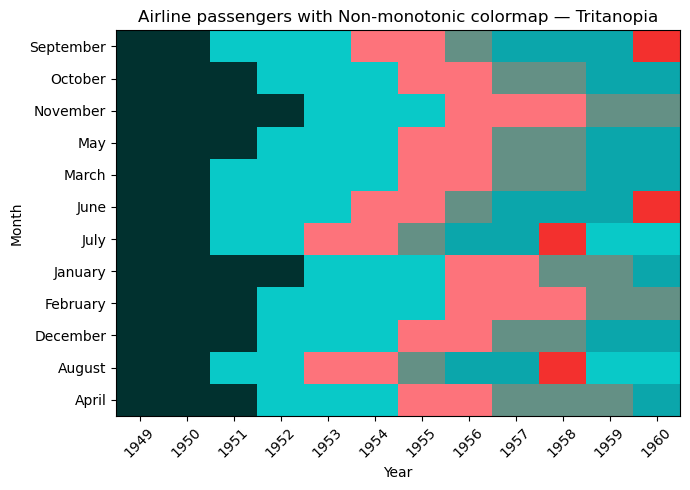

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import pandas as pd

# -----------------------------
# 1. Load sample dataset
# -----------------------------
url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/flights.csv"
df = pd.read_csv(url)  # monthly airline passengers
pivot = df.pivot(index="month", columns="year", values="passengers")
data = pivot.values.astype(float)

# Normalize to [0,1]
Z = (data - data.min()) / (data.max() - data.min())

# -----------------------------
# 2. Define non-monotonic colormap
# -----------------------------
non_mono_colors = [
    "#001f3f", "#00bcd4", "#ffe21f",
    "#6a00ff", "#00e676", "#ff1744", "#00bcd4"  # loops back
]
NON_MONO = ListedColormap(non_mono_colors, name="non_mono_loop")

# -----------------------------
# 3. Color vision deficiency matrices
# -----------------------------
PROTANOPIA = np.array([
    [0.567, 0.433, 0.0],
    [0.558, 0.442, 0.0],
    [0.0,   0.242, 0.758]
])

DEUTERANOPIA = np.array([
    [0.625, 0.375, 0.0],
    [0.7,   0.3,   0.0],
    [0.0,   0.3,   0.7]
])

TRITANOPIA = np.array([
    [0.95,  0.05,  0.0],
    [0.0,   0.433, 0.567],
    [0.0,   0.475, 0.525]
])

def clamp01(arr):
    return np.clip(arr, 0.0, 1.0)

def apply_cvd(rgb, M):
    h, w, _ = rgb.shape
    flat = rgb.reshape(-1, 3)
    out = flat @ M.T
    return clamp01(out).reshape(h, w, 3)

# -----------------------------
# 4. Visualization
# -----------------------------
def show_cvd(field, cmap, label):
    rgba = cmap(field)
    rgb = rgba[..., :3]

    sims = [
        (rgb, "Normal vision"),
        (apply_cvd(rgb, PROTANOPIA), "Protanopia"),
        (apply_cvd(rgb, DEUTERANOPIA), "Deuteranopia"),
        (apply_cvd(rgb, TRITANOPIA), "Tritanopia"),
    ]

    for sim_img, sim_name in sims:
        plt.figure(figsize=(7, 5))
        plt.imshow(sim_img, origin="lower", aspect="auto")
        plt.xticks(range(len(pivot.columns)), pivot.columns, rotation=45)
        plt.yticks(range(len(pivot.index)), pivot.index)
        plt.title(f"{label} — {sim_name}")
        plt.xlabel("Year")
        plt.ylabel("Month")
        plt.tight_layout()
        plt.show()

# -----------------------------
# Run with airline passengers data
# -----------------------------
show_cvd(Z, NON_MONO, "Airline passengers with Non-monotonic colormap")